# Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for custom legends
import seaborn as sns
from lifelines import KaplanMeierFitter #survival analysis library
from lifelines.statistics import logrank_test #survival statistical testing
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline


# Data

In [142]:
url="https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=51304980933215218170416&cm_mc_sid_50200000=92178841521817041648&cm_mc_sid_52640000=98592221521817041652"
df = pd.read_csv(url)
print(df.shape)
df.tail().transpose()

(7043, 21)


,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [143]:
df["b_Churn"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0) #recode churn var


In [144]:
df.tail().transpose()

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


# Some Transformations

In [145]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [146]:
#drop "No phone service"
df[df.MultipleLines != "No phone service"]
df.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [147]:
#recode MultipleLines var to get our two comparison cohorts
df["b_MultipleLines"] = df.MultipleLines.apply(lambda x: 1 if x == "Yes" else 0)

In [148]:
df.b_MultipleLines.value_counts()

0    4072
1    2971
Name: b_MultipleLines, dtype: int64

In [149]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

# Kaplan Meier

In [180]:
kmf = KaplanMeierFitter()
T = df['tenure'] #duration
C = df["b_Churn"] #censorship - 1 if death/churn is seen, 0 if censored

In [181]:
kmf.fit(durations = df.tenure, 
        event_observed = df.b_Churn)

<lifelines.KaplanMeierFitter: fitted with 7043 observations, 5174 censored>

In [182]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,11,0,11,7043,7043
1,613,380,233,0,7032
2,238,123,115,0,6419
3,200,94,106,0,6181
4,176,83,93,0,5981
5,133,64,69,0,5805
6,110,40,70,0,5672
7,131,51,80,0,5562
8,123,42,81,0,5431


In [183]:
kmf.survival_function_


,KM_estimate
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
5.0,0.891111
6.0,0.884826
7.0,0.876713
8.0,0.869933


In [184]:
kmf.median_


inf

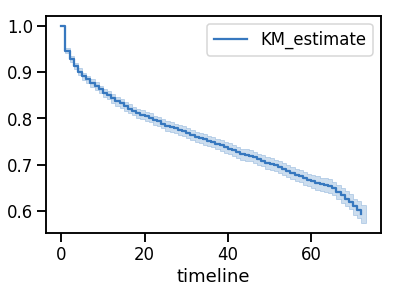

In [185]:
kmf.plot()

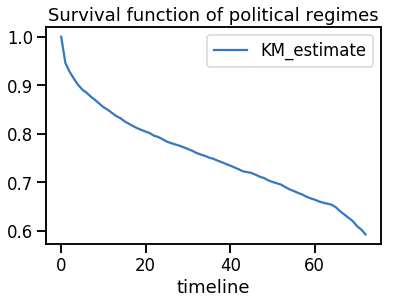

In [186]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

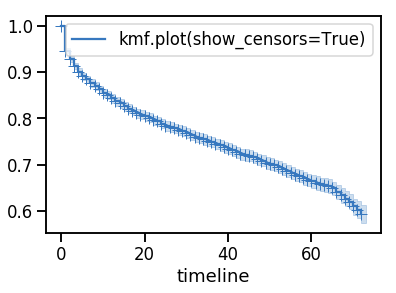

In [230]:
kmf.fit(T, C, label="kmf.plot(show_censors=True)")
kmf.plot(show_censors=True)

# KM by group

In [156]:

T = df['tenure'] #duration
E = df["b_Churn"] #censorship - 1 if death/churn is seen, 0 if censored

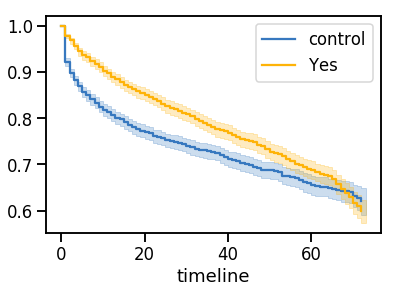

In [157]:
groups = df['MultipleLines']
ix = (groups == 'Yes')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='Yes')
kmf.plot(ax=ax)

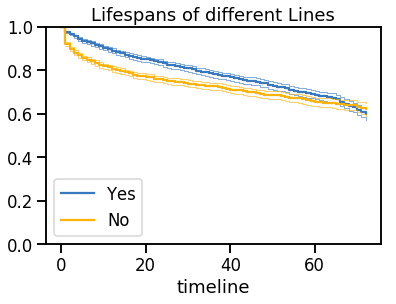

In [187]:
ax = plt.subplot(111)

dem = (df["MultipleLines"] == "Yes")
kmf.fit(T[dem], event_observed=E[dem], label="Yes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=E[~dem], label="No")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0, 1);
plt.title("Lifespans of different Lines");

Median survival time of Yes: inf
Median survival time of No: inf


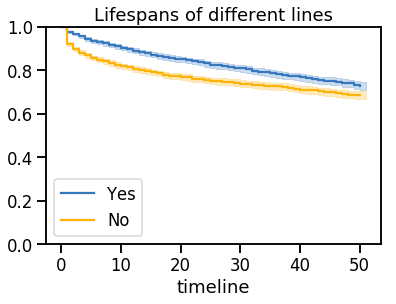

In [189]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Yes")
ax = kmf.plot(ax=ax)
print("Median survival time of Yes:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="No")
ax = kmf.plot(ax=ax)
print("Median survival time of No:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different lines");

In [190]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
       24.8504 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


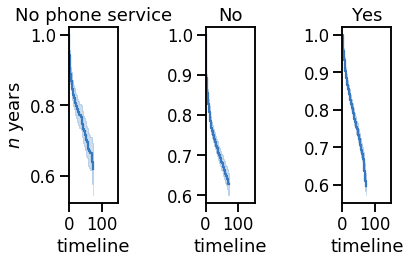

In [201]:
regime_types = df['MultipleLines'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(1, 3, i+1)
    ix = df['MultipleLines'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 150)
    if i==0:
        plt.ylabel('$n$ years')
plt.tight_layout()

# Weibull

In [211]:
from lifelines import WeibullFitter

T = df['tenure']+.00001
E = df['b_Churn']

wf = WeibullFitter()
wf.fit(T, E)
print(wf.lambda_, wf.rho_)
wf.print_summary()

0.004539494588420575 0.644703245441282
n=7043, number of events=1869

          coef  se(coef)  lower 0.95  upper 0.95
lambda_ 0.0045    0.0002      0.0041      0.0050
rho_    0.6447    0.0133      0.6187      0.6707


# Survival from events

In [159]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
print(table.head())

          removed  observed  censored  entrance  at_risk
event_at                                                
0              11         0        11      7043     7043
1             613       380       233         0     7032
2             238       123       115         0     6419
3             200        94       106         0     6181
4             176        83        93         0     5981


# CoxPH

In [167]:
dfp=pd.DataFrame(df)

In [173]:
dfp2=dfp[dfp.describe().columns]

In [174]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(dfp2, 'tenure', event_col='b_Churn')
cph.print_summary()

n=7043, number of events=1869

                   coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
SeniorCitizen    0.4998     1.6483    0.0545   9.1658 0.0000      0.3929      0.6066  ***
MonthlyCharges   0.0093     1.0094    0.0009  10.0505 0.0000      0.0075      0.0111  ***
b_MultipleLines -0.5680     0.5667    0.0535 -10.6144 0.0000     -0.6728     -0.4631  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.596
Likelihood ratio test = 245.056 on 3 df, p=0.00000


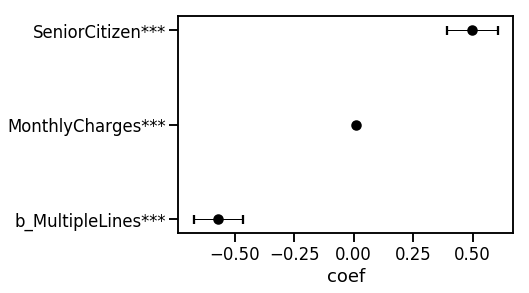

In [175]:
cph.plot()

In [223]:
dfp2.describe()

,SeniorCitizen,tenure,MonthlyCharges,b_Churn,b_MultipleLines
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,0.421837
std,0.368612,24.559481,30.090047,0.441561,0.493888
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000


In [224]:
X = dfp2.drop(["tenure", "b_Churn"], axis=1)
cph.predict_partial_hazard(X)
cph.predict_survival_function(X)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
event_at,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.957963,0.946214,0.947705,0.952914,0.939089,0.954428,0.958606,0.958001,0.952242,0.946603,...,0.939746,0.953039,0.934532,0.944381,0.961172,0.960199,0.952932,0.958058,0.941048,0.916638
2,0.943475,0.927833,0.929814,0.936745,0.918380,0.938762,0.944334,0.943526,0.935850,0.928349,...,0.919250,0.936911,0.912347,0.925398,0.947760,0.946461,0.936768,0.943603,0.920976,0.888760
3,0.932104,0.913462,0.915820,0.924076,0.902228,0.926480,0.933129,0.932165,0.923008,0.914077,...,0.903261,0.924273,0.895071,0.910566,0.937222,0.935670,0.924103,0.932257,0.905312,0.867184
4,0.921842,0.900536,0.903227,0.912658,0.887729,0.915407,0.923015,0.921912,0.911438,0.901237,...,0.888906,0.912884,0.879584,0.897232,0.927703,0.925925,0.912690,0.922016,0.891242,0.847943
5,0.913774,0.890403,0.893352,0.903692,0.876384,0.906709,0.915063,0.913851,0.902354,0.891171,...,0.877671,0.903940,0.867478,0.886784,0.920214,0.918259,0.903727,0.913966,0.880227,0.832970
6,0.908641,0.883970,0.887080,0.897994,0.869190,0.901180,0.910004,0.908722,0.896581,0.884780,...,0.870546,0.898256,0.859808,0.880154,0.915447,0.913381,0.898031,0.908844,0.873240,0.823515
7,0.902007,0.875670,0.878987,0.890634,0.859918,0.894035,0.903462,0.902093,0.889125,0.876534,...,0.861363,0.890913,0.849931,0.871601,0.909281,0.907073,0.890673,0.902223,0.864233,0.811374
8,0.896443,0.868723,0.872211,0.884467,0.852168,0.888048,0.897976,0.896534,0.882879,0.869631,...,0.853685,0.884761,0.841680,0.864444,0.904108,0.901780,0.884508,0.896671,0.856700,0.801262


In [226]:
dfp2.describe()

,SeniorCitizen,tenure,MonthlyCharges,b_Churn,b_MultipleLines
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,0.421837
std,0.368612,24.559481,30.090047,0.441561,0.493888
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000


In [228]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation


cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, dfp2, 'tenure', event_col='b_Churn', k=3)
print("scores", scores)
print("mean", np.mean(scores))
print("stD", np.std(scores))

scores [0.614380652824168, 0.589085653975167, 0.5853748670979442]
mean 0.596280391299093
stD 0.012888162146433015


# Nelson Aalen

In [158]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 7043 observations, 5174 censored>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.055550
2.0          0.074896
3.0          0.090219
4.0          0.104193


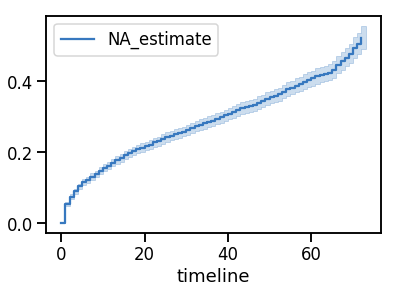

In [212]:
print(naf.cumulative_hazard_.head())
naf.plot()

In [176]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(dfp2, 'tenure', event_col='b_Churn')

<lifelines.AalenAdditiveFitter: fitted with 7043 observations, 5174 censored>

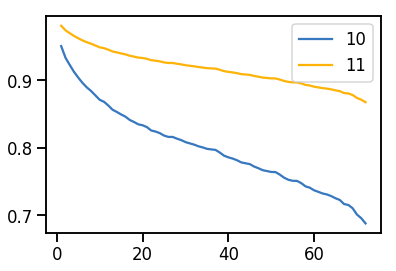

In [177]:
X = dfp2.drop(['tenure', 'b_Churn'], axis=1)
aaf.predict_survival_function(X.iloc[10:12]).plot() 

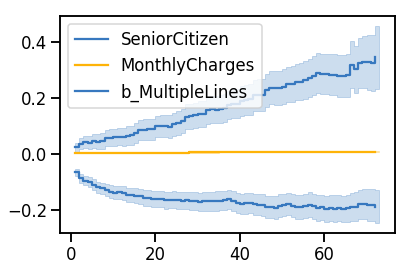

In [178]:
aaf.plot()

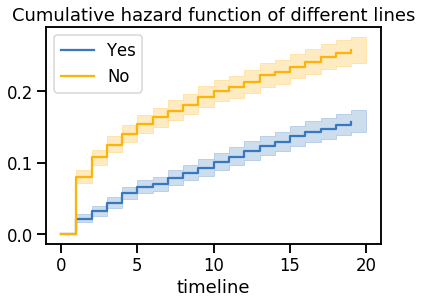

In [213]:
naf.fit(T[dem], event_observed=E[dem], label="Yes")
ax = naf.plot(loc=slice(0, 20))
naf.fit(T[~dem], event_observed=E[~dem], label="No")
naf.plot(ax=ax, loc=slice(0, 20))
plt.title("Cumulative hazard function of different lines");

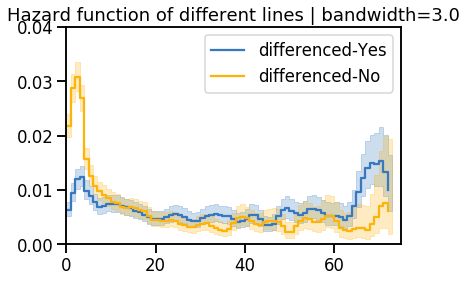

In [221]:
b = 3.
naf.fit(T[dem], event_observed=E[dem], label="Yes")
ax = naf.plot_hazard(bandwidth=b)
naf.fit(T[~dem], event_observed=E[~dem], label="No")
naf.plot_hazard(ax=ax, bandwidth=b)
plt.title("Hazard function of different lines | bandwidth=%.1f"%b);
plt.ylim(0, 0.04)
plt.xlim(0, 75);

# Model Selection

In [229]:


#create the three models we'd like to compare.
aaf_1 = AalenAdditiveFitter(coef_penalizer=0.5)
aaf_2 = AalenAdditiveFitter(coef_penalizer=10)
cph = CoxPHFitter()

print(np.mean(k_fold_cross_validation(cph, dfp2, duration_col='tenure', event_col='b_Churn')))
print(np.mean(k_fold_cross_validation(aaf_1, dfp2, duration_col='tenure', event_col='b_Churn')))
print(np.mean(k_fold_cross_validation(aaf_2, dfp2, duration_col='tenure', event_col='b_Churn')))

0.595248847921206
0.5957145171827003
0.5972051728832404


# Manual Checks - KM

In [76]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]


In [77]:
event_at_0

removed       11
observed       0
censored      11
entrance    7043
at_risk     7043
Name: 0, dtype: int64

In [78]:
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

1.0

In [79]:
# Calculate the survival probability for t = 1
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.9459613196814562

In [80]:
# Calculate the survival probability for t = 2
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.9808381367814302

In [81]:
#The probability that is longer than 2 years
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.9278349382636624

In [82]:
kmf.predict(2)

0.9278349382636628

In [83]:
kmf.predict(1)

0.9459613196814566

In [84]:
kmf.predict(0)

1.0

In [45]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
5.0,0.891111
6.0,0.884826
7.0,0.876713
8.0,0.869933


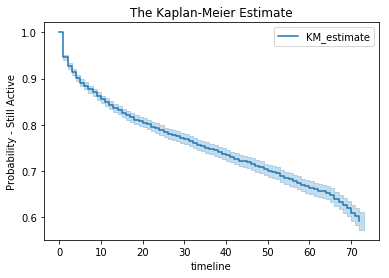

In [46]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability - Still Active")

plt.show()

In [47]:
kmf.median_

inf

In [34]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [36]:
len(df.Partner.unique())

2

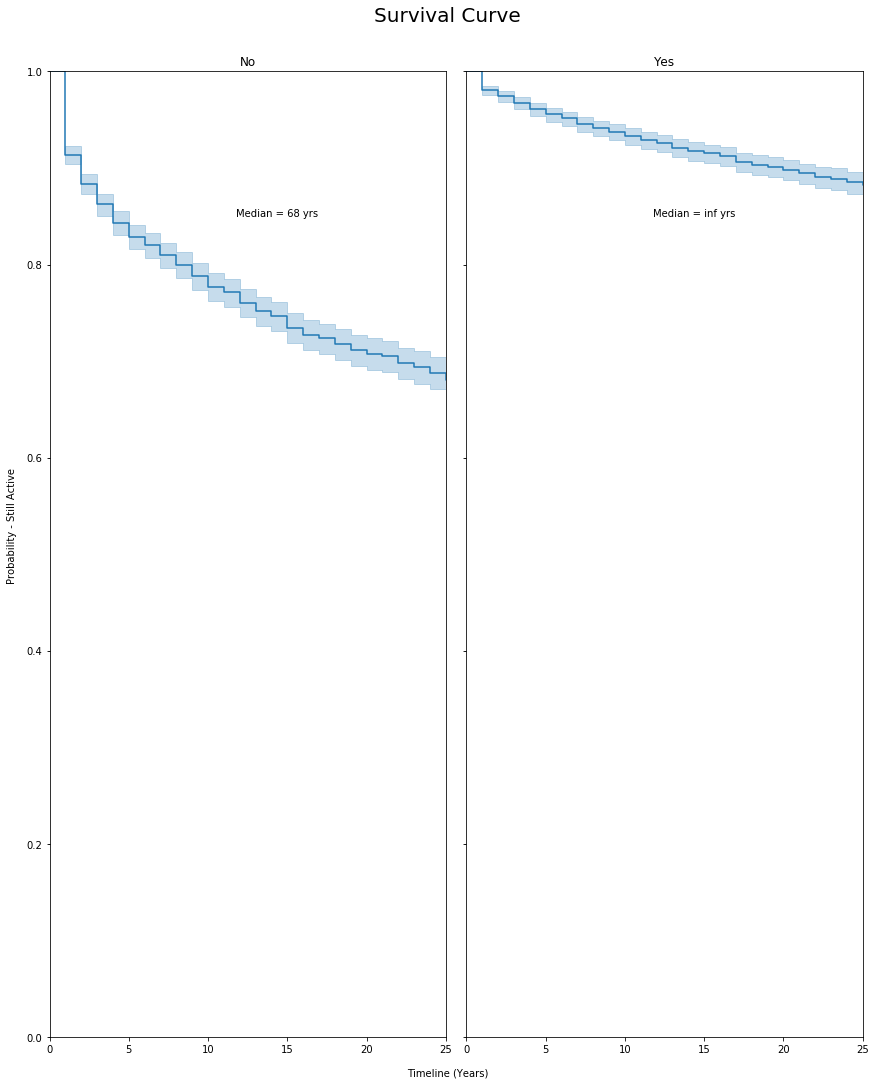

In [42]:
# create a new KMF object
kmf_by_pos = KaplanMeierFitter()

duration = df.tenure
observed = df.b_Churn

# Set the order that the positions will be plotted
positions = ["No", "Yes"]

# Set up the the 5x3 plotting grid by creating figure and axes objects
# Set sharey to True so that each row of plots share the left most y-axis labels
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True,
                         figsize=(12,15))

# flatten() creates a 1-D array of the individual axes (or subplots)
# that we will plot on in our grid
# We zip together the two 1-D arrays containing the positions and axes
# so we can iterate over each postion and plot its KM estimate onto 
# its respective axes
for pos, ax in zip(positions, axes.flatten()):
    # get indices for players with the matching position label
    idx = df.Partner == pos
    # fit the kmf for the those players
    kmf_by_pos.fit(duration[idx], observed[idx])
    # plot the KM estimate for that position on its respective axes
    kmf_by_pos.plot(ax=ax, legend=False)
    # place text indicating the median for the position
    # the xy-coord passed in represents the fractional value for each axis
    # for example (.5, .5) places text at the center of the plot
    ax.annotate("Median = {:.0f} yrs".format(kmf_by_pos.median_), xy = (.47, .85), 
                xycoords = "axes fraction")
    # get rid the default "timeline" x-axis label set by kmf.plot() 
    ax.set_xlabel("")
    # label each plot by its position
    ax.set_title(pos)
    # set a common x and y axis across all plots
    ax.set_xlim(0,25)
    ax.set_ylim(0,1)

# tighten up the padding for the subplots
fig.tight_layout()

# https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots
# set a common x-axis label
fig.text(0.5, -0.01, "Timeline (Years)", ha="center")
# set a common y-axis label
fig.text(-0.01, 0.5, "Probability - Still Active", 
         va="center", rotation="vertical")
# add the title for the whole plot
fig.suptitle("Survival Curve",
             fontsize=20)
# add some padding between the title and the rest of the plot to avoid overlap
fig.subplots_adjust(top=0.92)

plt.show()

In [122]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

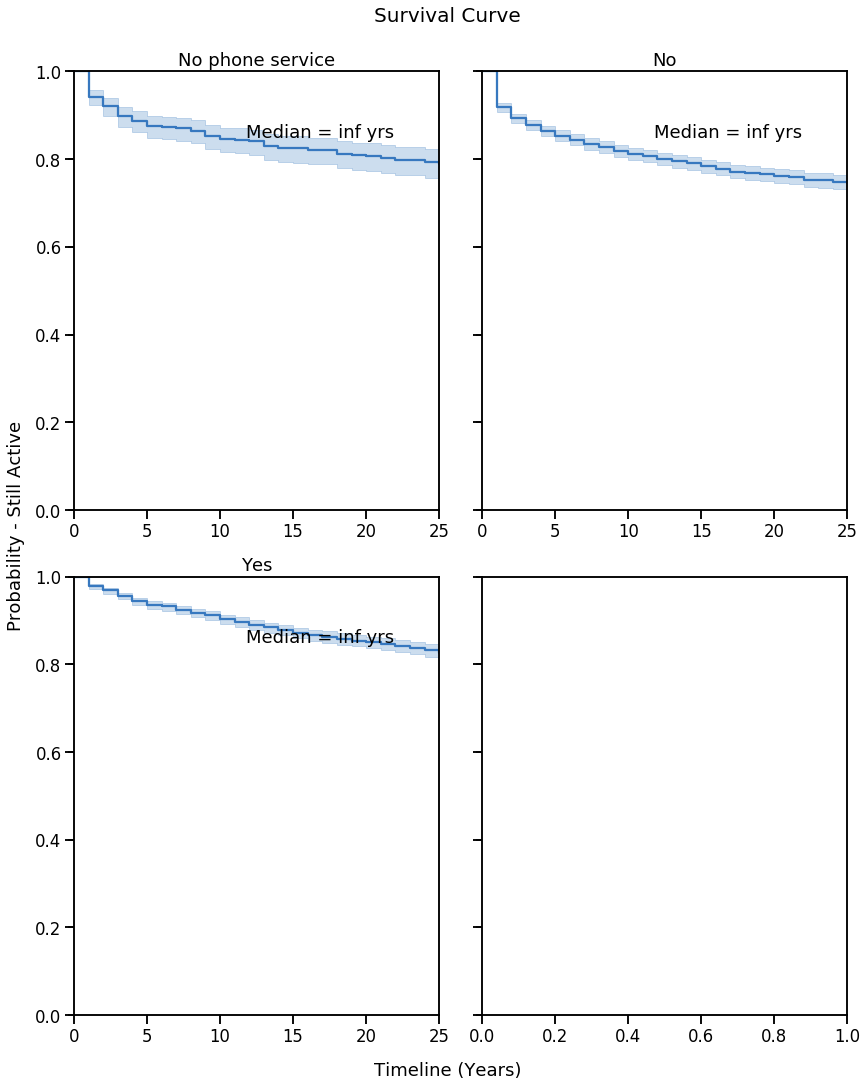

In [124]:
# create a new KMF object
kmf_by_pos = KaplanMeierFitter()

duration = df.tenure
observed = df.b_Churn

# Set the order that the positions will be plotted
positions = ["No phone service", "No", "Yes"]

# Set up the the 5x3 plotting grid by creating figure and axes objects
# Set sharey to True so that each row of plots share the left most y-axis labels
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharey = True,
                         figsize=(12,15))

# flatten() creates a 1-D array of the individual axes (or subplots)
# that we will plot on in our grid
# We zip together the two 1-D arrays containing the positions and axes
# so we can iterate over each postion and plot its KM estimate onto 
# its respective axes
for pos, ax in zip(positions, axes.flatten()):
    # get indices for players with the matching position label
    idx = df.MultipleLines == pos
    # fit the kmf for the those players
    kmf_by_pos.fit(duration[idx], observed[idx])
    # plot the KM estimate for that position on its respective axes
    kmf_by_pos.plot(ax=ax, legend=False)
    # place text indicating the median for the position
    # the xy-coord passed in represents the fractional value for each axis
    # for example (.5, .5) places text at the center of the plot
    ax.annotate("Median = {:.0f} yrs".format(kmf_by_pos.median_), xy = (.47, .85), 
                xycoords = "axes fraction")
    # get rid the default "timeline" x-axis label set by kmf.plot() 
    ax.set_xlabel("")
    # label each plot by its position
    ax.set_title(pos)
    # set a common x and y axis across all plots
    ax.set_xlim(0,25)
    ax.set_ylim(0,1)

# tighten up the padding for the subplots
fig.tight_layout()

# https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots
# set a common x-axis label
fig.text(0.5, -0.01, "Timeline (Years)", ha="center")
# set a common y-axis label
fig.text(-0.01, 0.5, "Probability - Still Active", 
         va="center", rotation="vertical")
# add the title for the whole plot
fig.suptitle("Survival Curve",
             fontsize=20)
# add some padding between the title and the rest of the plot to avoid overlap
fig.subplots_adjust(top=0.92)

plt.show()

In [100]:
df["b_Partner"] = df.Partner.apply(lambda x: 0 if x == "No" else 1)

# Log rank test & Hazard score

In [101]:
partner = (df["b_Partner"] == 1)
results = logrank_test(T[partner], T[~partner], C[partner], C[~partner], alpha=0.99 ) #at 99% confidence level
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
      423.5431 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [102]:
Z = results.test_statistic
D = C.sum() #number of events observed

hazard_ratio = np.exp(Z*np.sqrt(4/D))
print(hazard_ratio)

323268072.40851665


In [103]:
multi = (df["b_MultipleLines"] == 1)
results = logrank_test(T[multi], T[~multi], C[multi], C[~multi], alpha=0.99 ) #at 99% confidence level
results.print_summary()



t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
       24.8504 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [104]:
Z = results.test_statistic
D = C.sum() #number of events observed

hazard_ratio = np.exp(Z*np.sqrt(4/D))
print(hazard_ratio)

3.1570355740947194


# KM plots by Partner

1
                 1
timeline          
0.0       1.000000
1.0       0.980548
2.0       0.974596
3.0       0.967693
4.0       0.961040
5.0       0.955552
6.0       0.951259
7.0       0.945389
8.0       0.941334
9.0       0.937547
10.0      0.933098
11.0      0.928612
12.0      0.925708
13.0      0.921143
14.0      0.917525
15.0      0.915203
16.0      0.912188
17.0      0.906443
18.0      0.903374
19.0      0.901307
20.0      0.898180
21.0      0.894324
22.0      0.890446
23.0      0.889020
24.0      0.885033
25.0      0.882089
26.0      0.879855
27.0      0.877224
28.0      0.874945
29.0      0.871485
...            ...
43.0      0.828126
44.0      0.826725
45.0      0.826251
46.0      0.824321
47.0      0.819394
48.0      0.816882
49.0      0.812269
50.0      0.808082
51.0      0.805408
52.0      0.803218
53.0      0.797586
54.0      0.794128
55.0      0.790599
56.0      0.787567
57.0      0.784427
58.0      0.779266
59.0      0.774592
60.0      0.772524
61.0      0.768205
62.0      

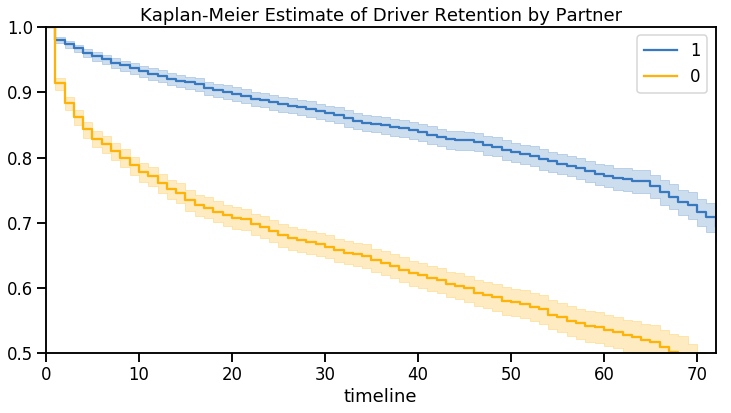

In [115]:
palette = ["windows blue", "amber"]
sns.set_palette(sns.xkcd_palette(palette))

##SET UP PLOT
ax = plt.subplot(111)
plt.title('Kaplan-Meier Estimate of Driver Retention by Partner')
sns.set_context("talk")

d={} #to store the models
vlines = []
i=0

##PLOT FITTED GRAPH
#loop through segmentation variable, plot on same axes
for segment in df.b_Partner.unique(): 
    ix = df.b_Partner == segment
    print(segment)
    d['kmf{}'.format(i+1)] = kmf.fit(T.loc[ix],C.loc[ix], label=segment)
    ax = kmf.plot(ax=ax, figsize=(12,6))
    ax.set_xlim([T.min(),T.max()])
    ax.set_ylim([0.5,1])
    print(kmf.survival_function_)
    y_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.77].dropna().index[0]
    #print(y_.head())
    #ymax_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.77].dropna()[i][y_]
    #print(ymax_)
    #vlines.append([y_, ymax_])
    i+=1



# KM plots by Lines

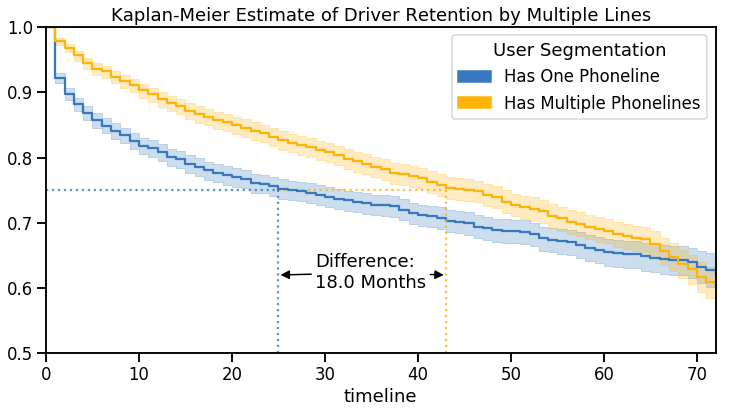

In [116]:
palette = ["windows blue", "amber"]
sns.set_palette(sns.xkcd_palette(palette))

##SET UP PLOT
ax = plt.subplot(111)
plt.title('Kaplan-Meier Estimate of Driver Retention by Multiple Lines')
sns.set_context("talk")

d={} #to store the models
vlines = []
i=0

##PLOT FITTED GRAPH
#loop through segmentation variable, plot on same axes
for segment in df.b_MultipleLines.unique(): 
    ix = df.b_MultipleLines == segment
    d['kmf{}'.format(i+1)] = kmf.fit(T.loc[ix],C.loc[ix], label=segment)
    ax = kmf.plot(ax=ax, figsize=(12,6))

    ax.set_xlim([T.min(),T.max()])
    ax.set_ylim([0.5,1])
    #print(kmf.survival_function_)
    y_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.75].dropna().index[0]
    ymax_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.75].dropna()[i][y_]
    #print (y_, ymax_)
    vlines.append([y_, ymax_])
    i+=1

##PLOT ANNOTATION
#for each intercept, plot a horizontal and a vertical line up to the fitted curve
xmin_=0
for i, xy in enumerate(vlines):
    xmax_ = xy[0]
    color="xkcd:{}".format(palette[i])
    
    plt.axvline(x=xy[0], ymax=.5, alpha=.8, color=color, linestyle='dotted') #axes fractional
    plt.hlines(y=.75, xmin=xmin_, xmax=xmax_, alpha=.8, color=color, linestyle='dotted') #axes data coordinates
    xmin_ += xmax_ #to avoid overlapping hlines

## position text label
difference = vlines[1][0]-vlines[0][0]
label_frac_x = (vlines[0][0]+(difference)/2)/T.max()-.07 #midpoint (minus .07 centering factor)
label_frac_y = 0.2

#label first line
ax.annotate('Difference:\n{} Months'.format(difference), 
  xy=(vlines[0][0],.62), xycoords='data', color='white',
  xytext=(label_frac_x,label_frac_y), textcoords='axes fraction',
  arrowprops=dict(arrowstyle="-|>", #arrows removed for reability
                  fc="k", ec="k")
           )

#label second line    
ax.annotate('Difference:\n{} Months'.format(difference), 
      xy=(vlines[1][0],.62), xycoords='data', color='black',
      xytext=(label_frac_x, label_frac_y), textcoords='axes fraction',
      arrowprops=dict(arrowstyle="-|>", #arrows removed for reability
                      fc="k", ec='k')
           )

##LEGEND
#override default legend
patches = [ mpatches.Patch(color="xkcd:windows blue", label='Has One Phoneline'),
            mpatches.Patch(color="xkcd:amber", label='Has Multiple Phonelines')
          ]
plt.legend(handles=[patches[0],patches[1]], title="User Segmentation", loc='best');

In [ ]:
#https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html